<a href="https://colab.research.google.com/github/KelvinLam05/Regression-Predictive-Modeling-Bike-Sharing-Demand/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract**

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

**Goal of the project**

We are required to model the demand for shared bikes with the available independent variables.

**Data set information**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.



**Attribute information**

* instant : record index

* dteday : date

* season : season (1 : winter, 2 : spring, 3 : summer, 4 : fall)

* yr : year (0 : 2011, 1 : 2012)

* mnth : month (1 to 12)

* holiday : weather day is holiday or not 

* weekday : day of the week

* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

* weathersit : 
  * 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

* atemp : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

* hum : Normalized humidity. The values are divided to 100 (max)

* windspeed : Normalized wind speed. The values are divided to 67 (max)

* casual : count of casual users

* registered : count of registered users

**Output variable (desired target)**

* cnt : count of total rental bikes including both casual and registered

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Load dataset
df = pd.read_csv('/content/bike sharing demand.csv')

In [ ]:
# Examine the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Exploratory Data Analysis**

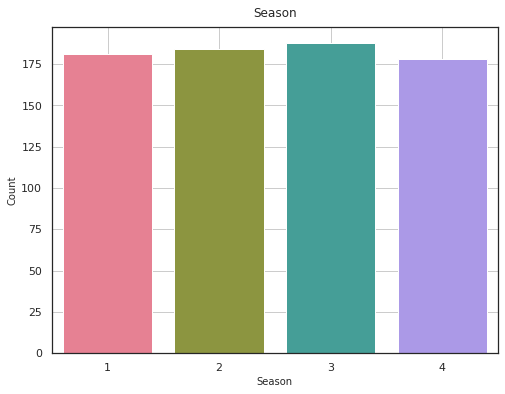

In [ ]:
# Plot
sns.set(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.countplot(x = 'season', data = df, palette = 'husl')
ax.set_title('Season', fontsize = 12, pad = 10)
ax.set_xlabel('Season', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.tick_params(left = False, bottom = False)
plt.grid() 
plt.show()

Season : season (1 : winter, 2 : spring, 3 : summer, 4 : fall)

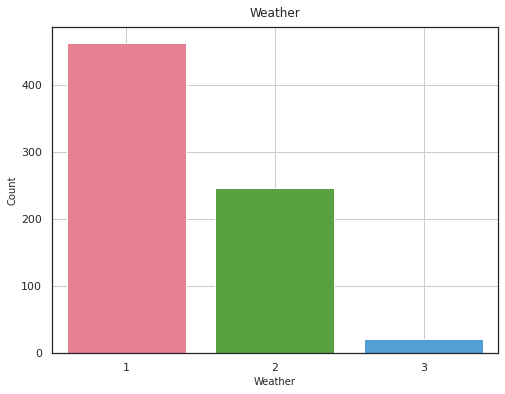

In [ ]:
# Plot
sns.set(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.countplot(x = 'weathersit', data = df, palette = 'husl')
ax.set_title('Weather', fontsize = 12, pad = 10)
ax.set_xlabel('Weather', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.tick_params(left = False, bottom = False)
plt.grid() 
plt.show()

Weathersit :
  
  * 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

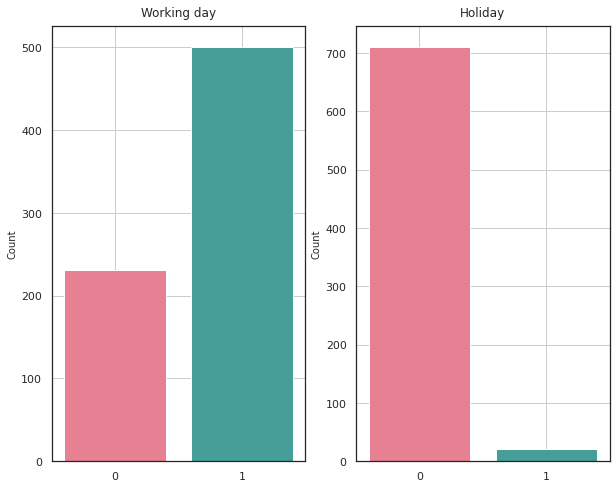

In [ ]:
# Plot
sns.set(style = 'ticks')
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 8))

sns.countplot(x = 'workingday', data = df, ax = ax1, palette = 'husl')
ax1.set_title('Working day', fontsize = 12, pad = 10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize = 10)
ax1.tick_params(left = False, bottom = False)
ax1.grid() 

sns.countplot(x = 'holiday', data = df, ax = ax2, palette = 'husl')
ax2.set_title('Holiday', fontsize = 12, pad = 10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize = 10)
ax2.tick_params(left = False, bottom = False)
ax2.grid() 

plt.show()

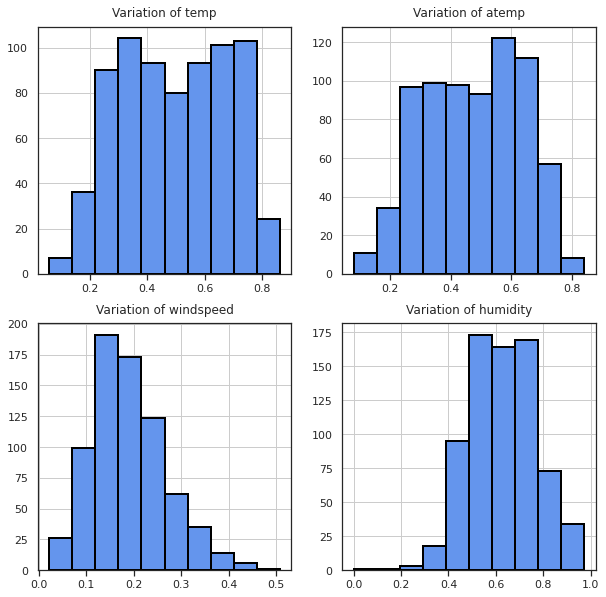

In [ ]:
# Plot
fig,axes = plt.subplots(2 ,2)
fig.set_size_inches(10 , 10)

axes[0,0].hist(x = 'temp', data = df, edgecolor = 'black', linewidth = 2,color = 'cornflowerblue')
axes[0,0].set_title('Variation of temp', pad = 10)
axes[0,0].tick_params(left = False)
axes[0,0].grid() 
axes[0,1].hist(x = 'atemp', data = df, edgecolor = 'black', linewidth = 2, color = 'cornflowerblue')
axes[0,1].set_title('Variation of atemp', pad = 10)
axes[0,1].tick_params(left = False)
axes[0,1].grid() 
axes[1,0].hist(x = 'windspeed', data = df, edgecolor = 'black', linewidth = 2, color = 'cornflowerblue')
axes[1,0].set_title('Variation of windspeed', pad = 10)
axes[1,0].tick_params(left = False)
axes[1,0].grid() 
axes[1,1].hist(x = 'hum', data = df,edgecolor = 'black', linewidth = 2,color = 'cornflowerblue')
axes[1,1].set_title('Variation of humidity', pad = 10)
axes[1,1].tick_params(left = False)
axes[1,1].grid() 

**Preprocessing** 

In [ ]:
# Displays duplicate records
df.duplicated().sum()

0

In [ ]:
# Transform dteday category to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
import missingno as msno

[]

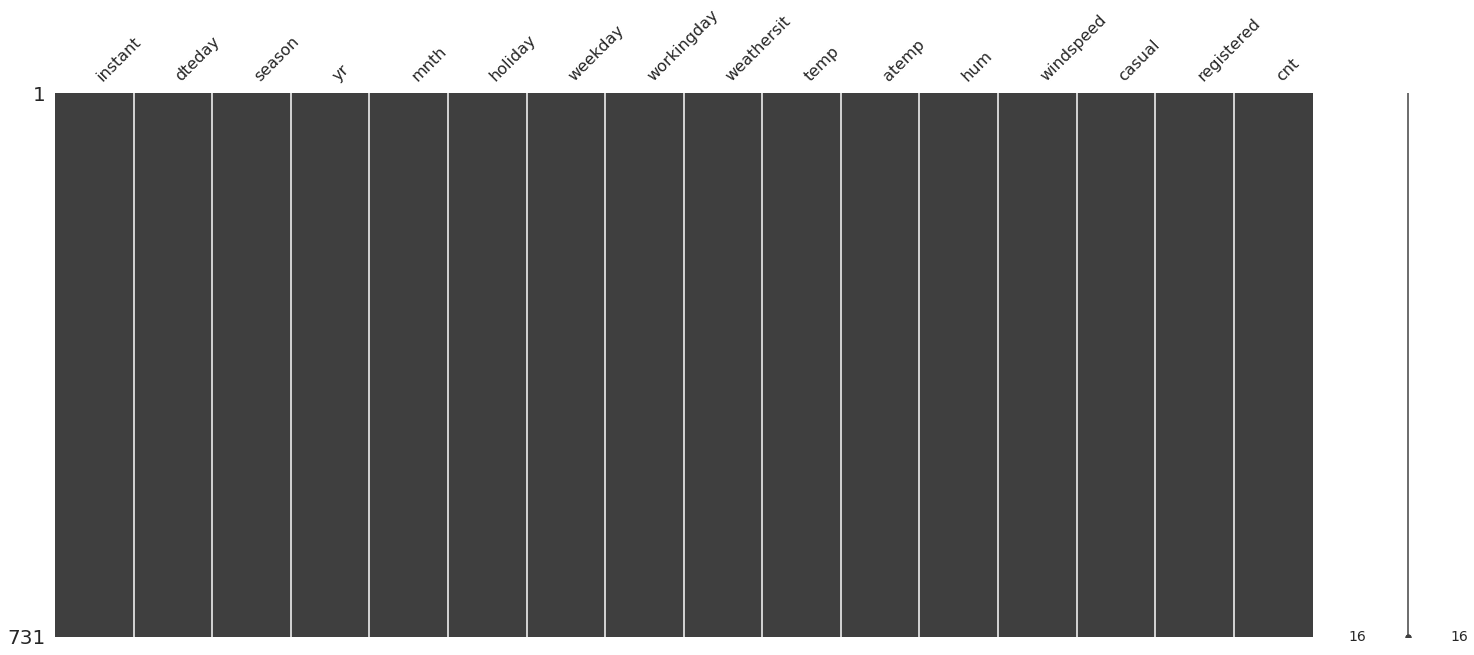

In [ ]:
# Visualize missing values (NaN) 
msno.matrix(df).plot(figsize = (8, 6))

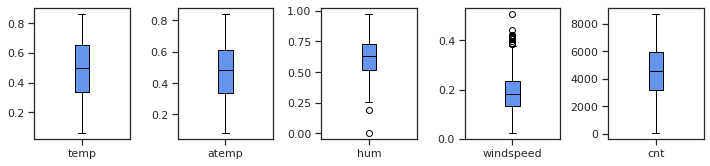

In [ ]:
# Select columns to plot 
df_to_plot = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

# Outlier detection with boxplots
df_to_plot.plot(subplots = True, layout = (5,5), kind = 'box', figsize = (12, 14), patch_artist = True, boxprops = dict(facecolor = 'cornflowerblue'),
            capprops = dict(color = 'black'),
            whiskerprops = dict(color = 'black'),
            flierprops = dict(markeredgecolor = 'black'),
            medianprops = dict(color = 'black')
            )
plt.tick_params(left = False, bottom = False)
plt.subplots_adjust(wspace = 0.5);

As a general rule of thumb:

* If skewness is less than -1 or greater than 1, the distribution is highly skewed
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

In [ ]:
from scipy.stats import skew

In [ ]:
print('Skew in numberical features :', skew(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], bias = False))

Skew in numberical features : [-0.05452096 -0.13108804 -0.06978343  0.67734542 -0.04735278]


For the variable windspeed, the skewness is 0.68, which indicates moderate skewness.

**Feature engineering**

In [ ]:
# Expand the dteday category to 3 new categories: month, weekday and day 
df['month'] = df['dteday'].dt.month
df['weekday'] = df['dteday'].dt.dayofweek
df['day'] = df['dteday'].dt.day

We should never use year as a feature  because presumably we want to use this predictive model in the future and those future years wouldn’t be included in the dataset.

In [ ]:
# Exclude the original variables: instant, dteday, mnth and yr 
df = df.drop(['instant','dteday', 'mnth', 'yr'], axis = 1)

In [ ]:
# Exclude the original variables: registered and casual because they supply redundant information
df = df.drop(['registered','casual'], axis = 1)

In [ ]:
# Verifying if the variables are added to our main data frame
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,day
0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,985,1,1
1,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,801,1,2
2,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,3
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,4
4,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   holiday     731 non-null    int64  
 2   weekday     731 non-null    int64  
 3   workingday  731 non-null    int64  
 4   weathersit  731 non-null    int64  
 5   temp        731 non-null    float64
 6   atemp       731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   cnt         731 non-null    int64  
 10  month       731 non-null    int64  
 11  day         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [ ]:
# Check the values in the season category
df.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [ ]:
# Check the values in the weathersit category
df.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

Next, create dummy variables from existing categorical variables.

In [ ]:
season = pd.get_dummies(df['season'], prefix = 'season')
df = pd.concat([df, season], axis = 1)
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,day,season_1,season_2,season_3,season_4
0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,985,1,1,1,0,0,0
1,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,801,1,2,1,0,0,0
2,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,3,1,0,0,0
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,4,1,0,0,0
4,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,5,1,0,0,0


In [ ]:
weathersit = pd.get_dummies(df['weathersit'], prefix = 'weathersit')
df = pd.concat([df, weathersit], axis = 1)
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,985,1,1,1,0,0,0,0,1,0
1,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,801,1,2,1,0,0,0,0,1,0
2,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,3,1,0,0,0,1,0,0
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,4,1,0,0,0,1,0,0
4,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,5,1,0,0,0,1,0,0


In [ ]:
month = pd.get_dummies(df['month'], prefix = 'month')
df = pd.concat([df, month], axis = 1)
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,985,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,801,1,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
weekday = pd.get_dummies(df['weekday'], prefix = 'weekday')
df = pd.concat([df, weekday], axis = 1)
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,985,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,801,1,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
workingday = pd.get_dummies(df['workingday'], prefix = 'workingday')
df = pd.concat([df,workingday], axis = 1)
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1
0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,985,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,801,1,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
holiday = pd.get_dummies(df['holiday'], prefix = 'holiday')
df = pd.concat([df, holiday],axis = 1)
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,holiday_0,holiday_1
0,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,985,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,801,1,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
# Exclude the original variables: season, weathersit, month, weekday, workingday and holiday
df = df.drop(['season', 'weathersit', 'month', 'weekday', 'workingday',  'holiday'], axis = 1)

The table below demonstrates how to interpret the size (strength) of a correlation coefficient.

Size of Correlation         | Interpretation
----------------------------|------------------------------------------
.90 to 1.00 (-.90 to -1.00) | Very high positive (negative) correlation 
.70 to 0.90 (-.70 to -0.90) | High positive (negative) correlation
.50 to 0.70 (-.50 to -0.70) | Moderate positive (negative) correlation
.30 to 0.50 (-.30 to -0.50) | Low positive (negative) correlation
.00 to 0.30 (-.00 to -0.30) | Negligible correlation 
  

In [ ]:
df.corr()[['cnt']].style.background_gradient(sns.light_palette('#2ecc71', as_cmap = True))

,cnt
temp,0.627494
atemp,0.631066
hum,-0.100659
windspeed,-0.234545
cnt,1.000000
day,-0.024204
season_1,-0.563094
season_2,0.146197
season_3,0.346487
season_4,0.065593


We expect temp and atemp to be more correlated with our target variable.

**Examine collinearity**

Including features that are highly correlated with each other, or are multicollinear, adds noise and inaccuracy, so we need to try and reduce this.

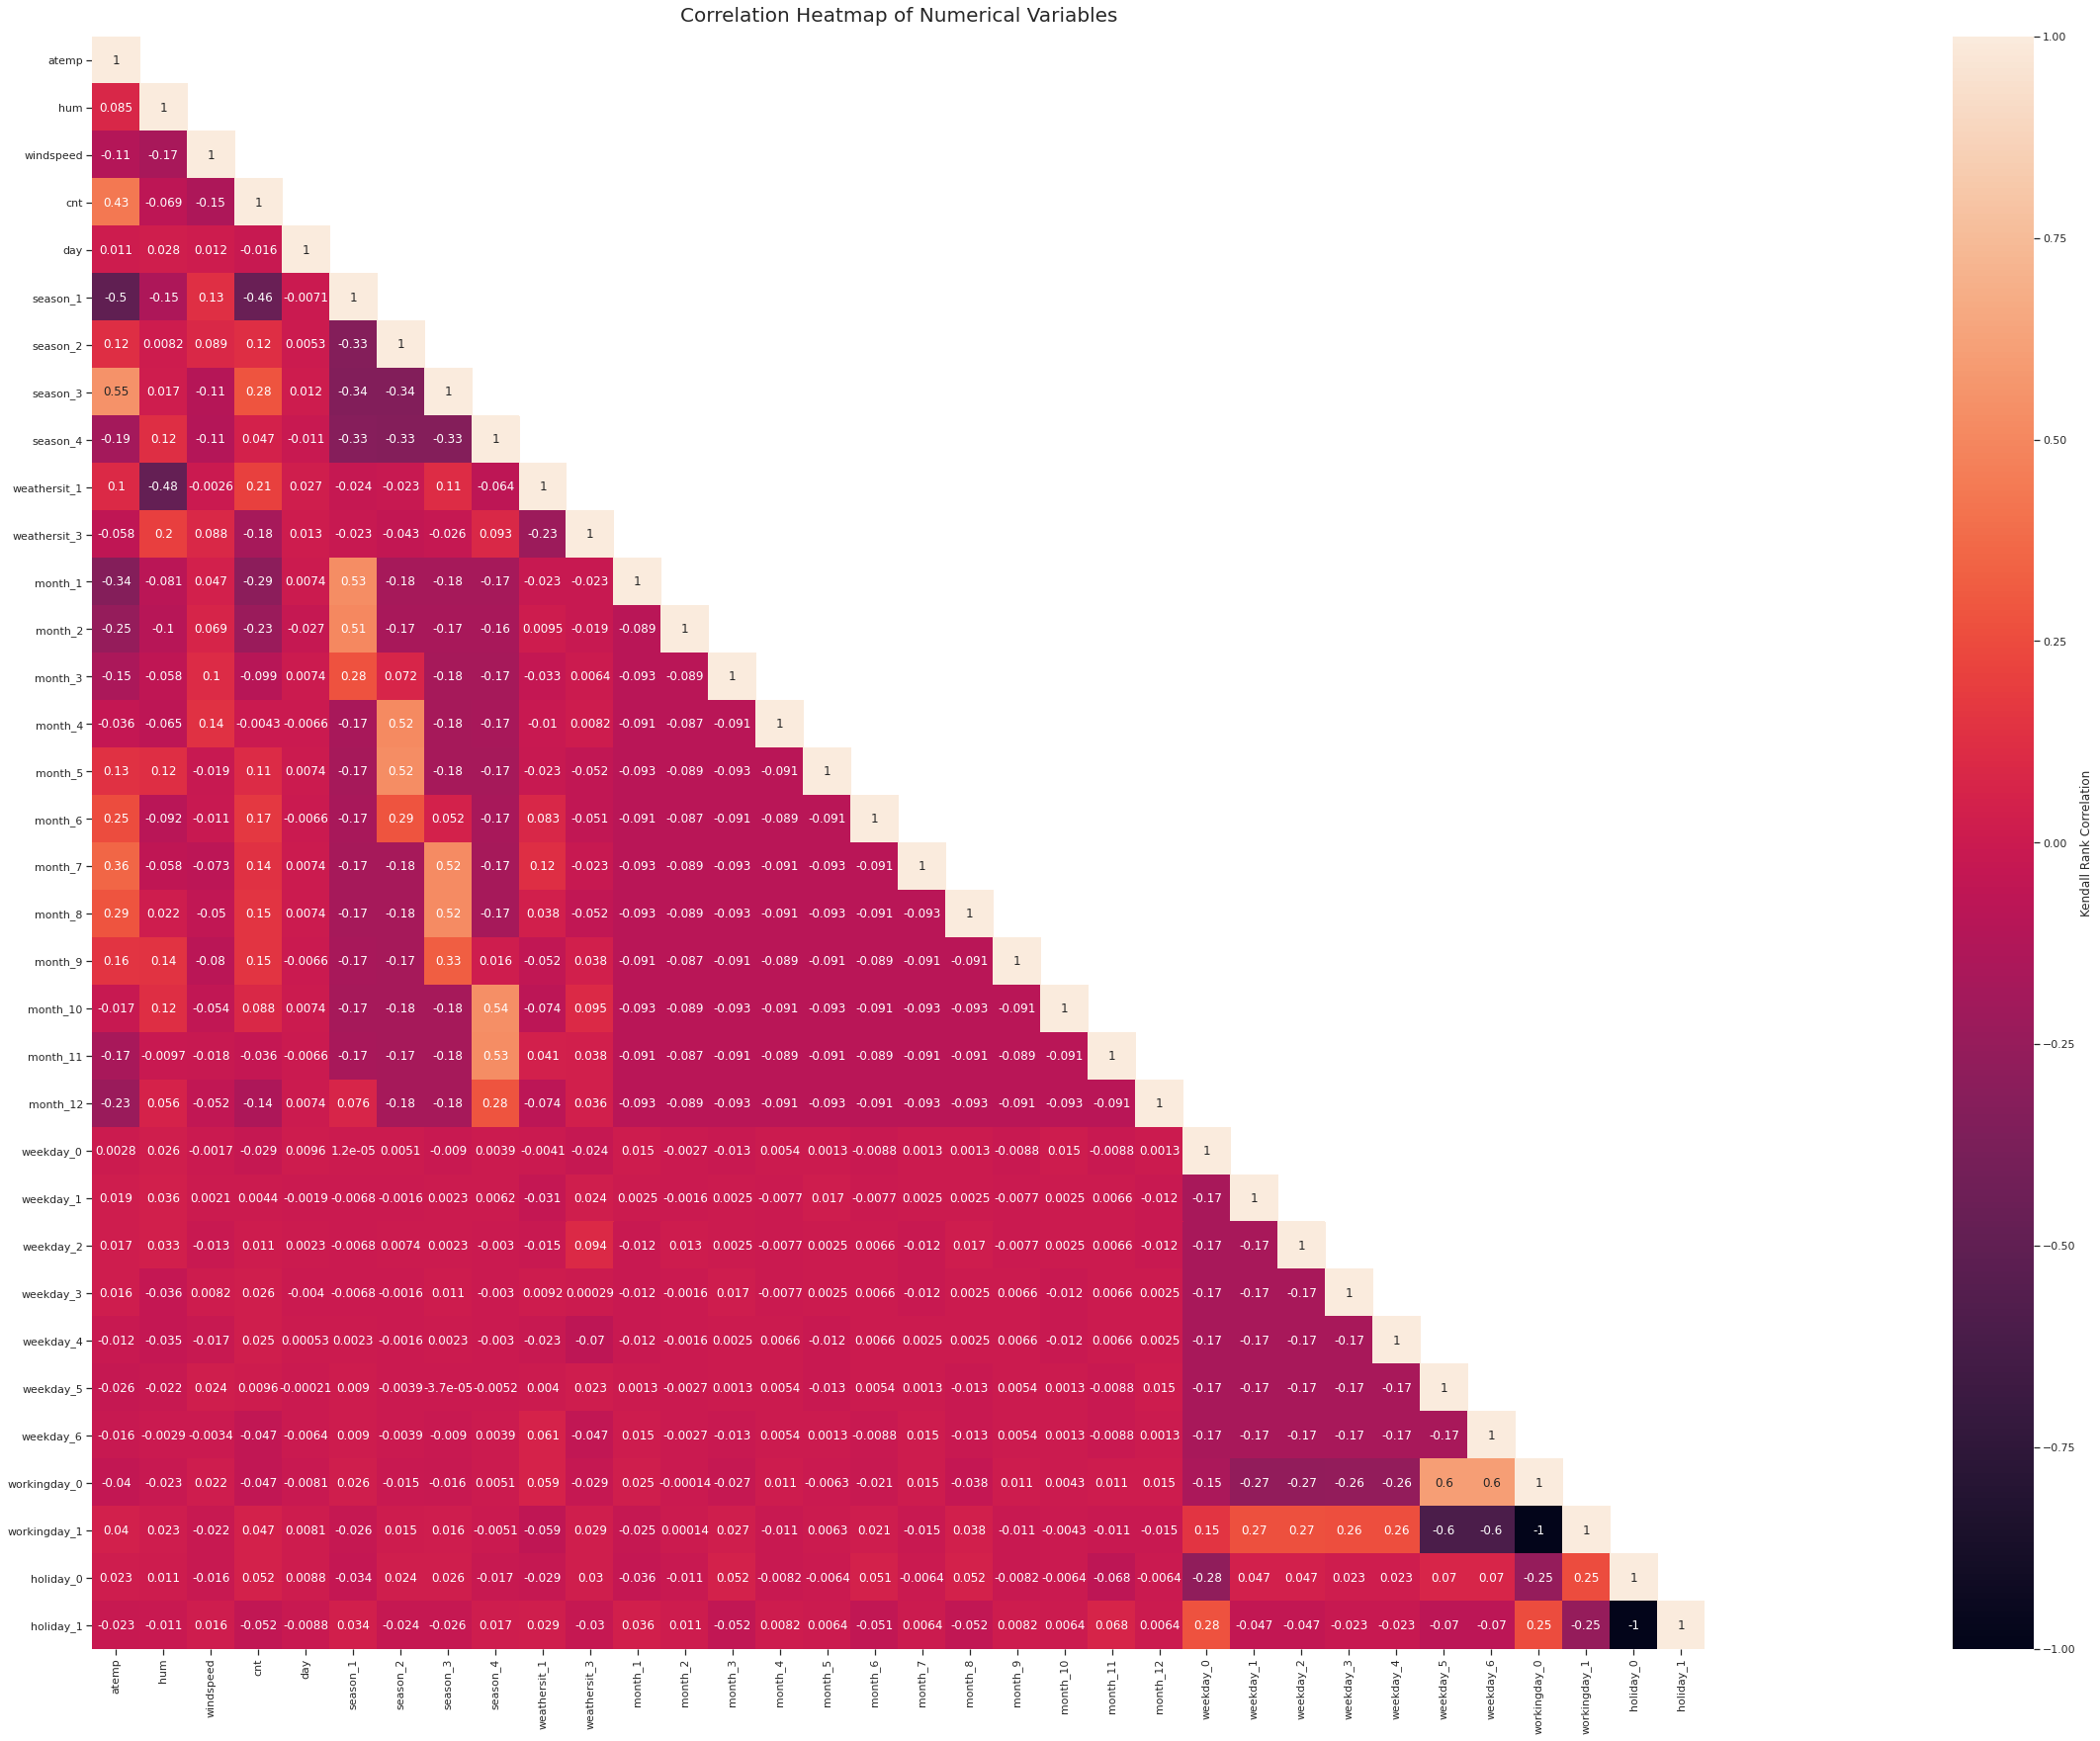

In [ ]:
# Using a non-parametric test of correlation (kendall), since some features are binary
cor_mat = df.corr(method = 'kendall')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(90, 30)
heatmap = sns.heatmap(data = cor_mat, mask = mask,square = True, annot = True, cbar = True, cbar_kws = {'label': 'Kendall Rank Correlation'})
heatmap.set_title('Correlation Heatmap of Numerical Variables', fontdict = {'fontsize': 20}, pad = 15);

In [ ]:
# Select columns to plot
df_num = df.select_dtypes(include = ['float64', 'int64', 'uint8'])

# Drop dependent variable
df_num.drop(['cnt'], axis = 1, inplace = True)

# Set threshold value
thresh = 0.8

# Get correlation matrix
df_corr = df_num.corr().abs().unstack()

# Filter
df_corr_filt = df_corr[(df_corr > thresh) & (df_corr != 1) | (df_corr < -thresh) & (df_corr != -1)].reset_index()

# Reanming the DataFrame columns
df_corr_filt.rename(columns = {'level_0': 'Var1','level_1': 'Var2', 0: 'value'}, inplace = True)

# Deduplicate
df_corr_filt.iloc[df_corr_filt[['Var1', 'Var2']].apply(lambda r: ''.join(map(str, sorted(r))), axis = 1).drop_duplicates().index]

,Var1,Var2,value
0,temp,atemp,0.991702
2,weathersit_1,weathersit_2,0.938964


So these pairs of independent variables shouldn't be used together in any of our models because they have a correlation of < -0.8 or > 0.8 and can therefore cause multicollinearity.

In [ ]:
df.corr()[['cnt']].style.background_gradient(sns.light_palette('#2ecc71', as_cmap = True))

,cnt
temp,0.627494
atemp,0.631066
hum,-0.100659
windspeed,-0.234545
cnt,1.000000
day,-0.024204
season_1,-0.563094
season_2,0.146197
season_3,0.346487
season_4,0.065593


A general rule to follow to identify severe collinearity is: If correlation is < -0.8 or > 0.8 between two variables or if a variable's Variance inflation factor (VIF) is greater than 20.

In [ ]:
# Drop one of the feactures 
df.drop(['temp', 'weathersit_2'], axis = 1, inplace = True)

**Split the train and test data**

In [ ]:
X = df.drop('cnt', axis = 1) 

In [ ]:
y = df['cnt']

In [ ]:
X.shape, y.shape

((731, 33), (731,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((584, 33), (584,))

In [ ]:
X_test.shape, y_test.shape

((147, 33), (147,))

As a general rule of thumb:

* If skewness is less than -1 or greater than 1, the distribution is highly skewed
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

In [ ]:
print('Skew in numberical feature :', skew(X_train[['windspeed']], bias = False))

Skew in numberical feature : [0.64452733]


The skewing probably “produced” the outliers. It might be possible to transform the data and eliminate some of the extreme values.

**Outlier treatment through Yeo-Johnson Power Transformation**

In [ ]:
from feature_engine import transformation as vt

In [ ]:
# Set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['windspeed'])

In [ ]:
# Fit the transformer
tf.fit(X_train)

YeoJohnsonTransformer(variables=['windspeed'])

In [ ]:
# Transform the data
train_t = tf.transform(X_train)
test_t = tf.transform(X_test)

In [ ]:
print('Skew in numberical feature :', skew(train_t[['windspeed']], bias = False))

Skew in numberical feature : [0.02312773]


The above output shows that the skewness value came down from 0.64 to 0.02, confirming that the distribution has been treated for extreme values.

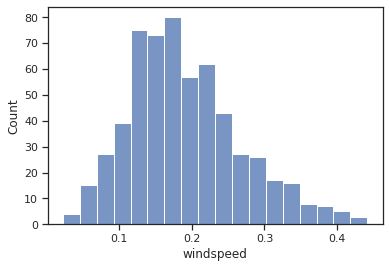

In [ ]:
# Un-transformed variable
sns.histplot(data = X_train, x = 'windspeed')

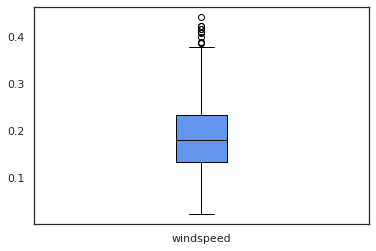

In [ ]:
# Un-transformed variable
X_train['windspeed'].plot(kind = 'box', figsize = (6, 4), patch_artist = True, boxprops = dict(facecolor = 'cornflowerblue'),
            capprops = dict(color = 'black'),
            whiskerprops = dict(color = 'black'),
            flierprops = dict(markeredgecolor = 'black'),
            medianprops = dict(color= 'black'),
            )
plt.tick_params(left = False, bottom = False)
plt.subplots_adjust(wspace = 0.5);

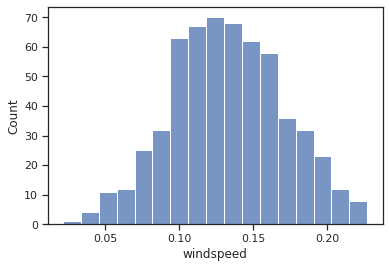

In [ ]:
# Transformed variable
sns.histplot(data = train_t, x = 'windspeed')

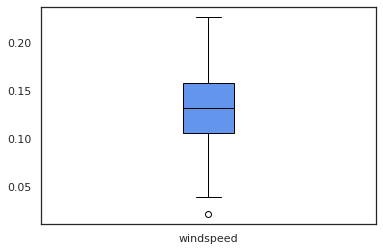

In [ ]:
# Transformed variable
train_t['windspeed'].plot(kind = 'box', figsize = (6, 4), patch_artist = True, boxprops = dict(facecolor = 'cornflowerblue'),
            capprops = dict(color = 'black'),
            whiskerprops = dict(color = 'black'),
            flierprops = dict(markeredgecolor = 'black'),
            medianprops = dict(color= 'black'),
            )
plt.tick_params(left = False, bottom = False)
plt.subplots_adjust(wspace = 0.5);

**Define the models**

In this project, three different ML models will be developed: a Linear Regression model, a Ridge model, and a Lasso model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Apply MinMaxScaler to our training and test sets
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(train_t), columns = train_t.columns)
X_test = pd.DataFrame(scaler.transform(test_t), columns = test_t.columns)

**Recursive feature elimination (Linear Regression)**

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score 

In [ ]:
# Create the model to be tuned
rfecv_lr_base = RFECV(LinearRegression())

In [ ]:
# Fit the model
rfecv_lr_base.fit(X_train, y_train)

RFECV(cv=None,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
# Check the support
rfecv_lr_base.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
print('Optimal number of features: {}'.format(rfecv_lr_base.n_features_))

Optimal number of features: 30


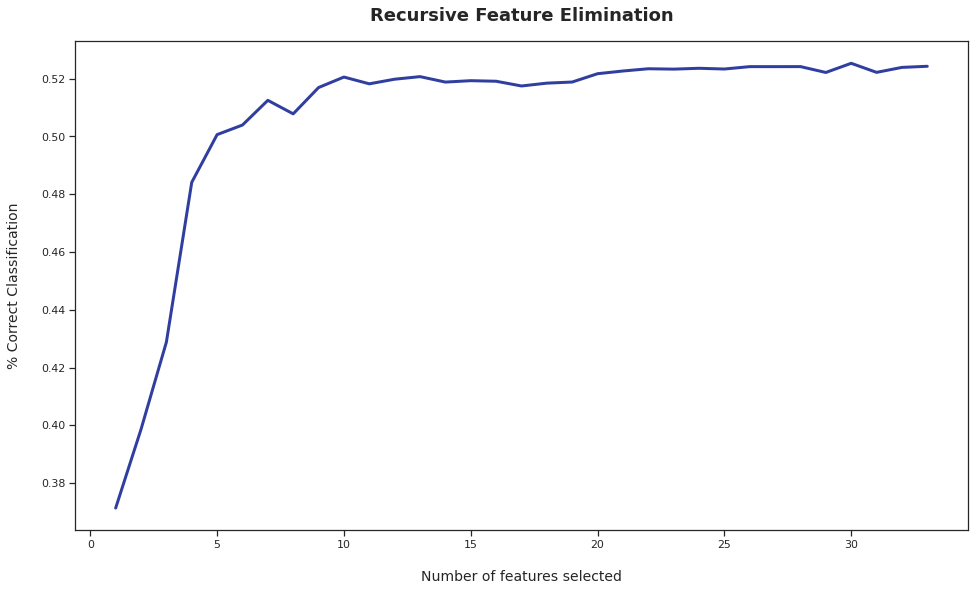

In [ ]:
# Plot
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination', fontsize = 18, fontweight = 'bold', pad = 20)
plt.xlabel('Number of features selected', fontsize = 14, labelpad = 20)
plt.ylabel('% Correct Classification', fontsize = 14, labelpad = 20)
plt.plot(range(1, len(rfecv_lr_base.grid_scores_) + 1), rfecv_lr_base.grid_scores_, color = '#303F9F', linewidth = 3)

plt.show()

In [ ]:
# Name wise features and count
feature_selected = X_train.columns[rfecv_lr_base.get_support()]
feature_selected

Index(['atemp', 'hum', 'day', 'season_1', 'season_2', 'season_3', 'season_4',
       'weathersit_1', 'weathersit_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'holiday_0', 'holiday_1'],
      dtype='object')

In [ ]:
# Function to calculate accuracy
def model_accuracy(X_train, X_test, y_train, y_test):
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred) 

Accuracy for all features and selected features respectively.

In [ ]:
# Accuracy for all features 
model_accuracy(X_train, X_test, y_train, y_test)

0.31084548689665126

In [ ]:
X_train_rfecv_lr_base = rfecv_lr_base.transform(X_train)
X_tets_rfecv_lr_base = rfecv_lr_base.transform(X_test)

In [ ]:
# Accuracy for selected features
model_accuracy(X_train_rfecv_lr_base, X_tets_rfecv_lr_base, y_train, y_test) 

0.5151145120406437

In [ ]:
# Create the final Linear Regression
lr_final = LinearRegression()

In [ ]:
# Fit the model
lr_final.fit(X_train_rfecv_lr_base, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions
y_pred_train = lr_final.predict(X_train_rfecv_lr_base)
y_pred_test = lr_final.predict(X_tets_rfecv_lr_base)

In [ ]:
# Print r-squared score
print('R-Square(train set):', r2_score(y_train, y_pred_train))
print('R-Square(test set):', r2_score(y_test, y_pred_test))

R-Square(train set): 0.5791818561086626
R-Square(test set): 0.5151145120406437


**Recursive feature elimination (Ridge)**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Create the model to be tuned
rfecv_ri_base = RFECV(Ridge(random_state = 42))

In [ ]:
# Fit the model
rfecv_ri_base.fit(X_train, y_train)

RFECV(cv=None,
      estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                      normalize=False, random_state=42, solver='auto',
                      tol=0.001),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
# Check the support
rfecv_ri_base.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True,  True,  True])

In [ ]:
print('Optimal number of features: {}'.format(rfecv_ri_base.n_features_))

Optimal number of features: 23


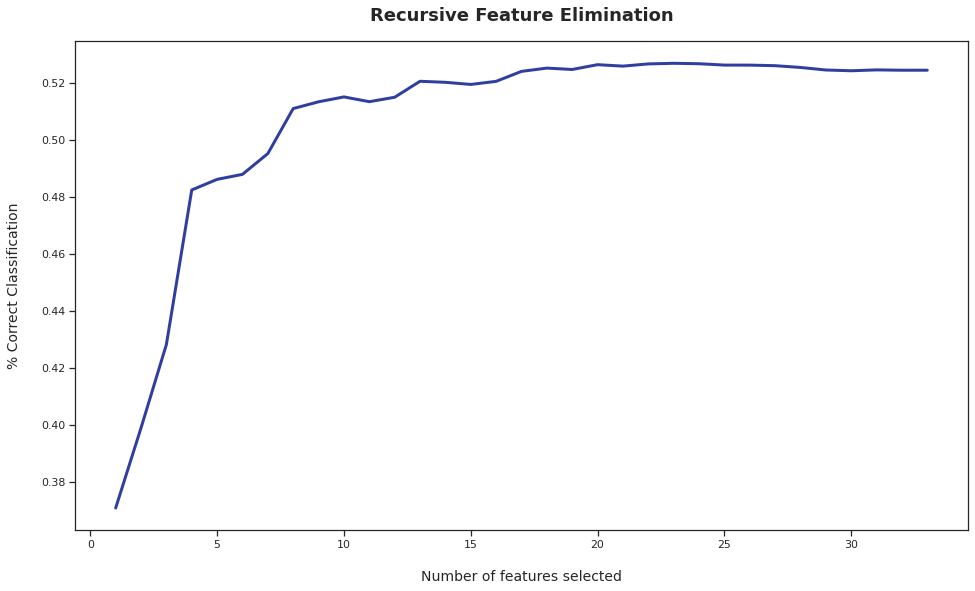

In [ ]:
# Plot
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination', fontsize = 18, fontweight = 'bold', pad = 20)
plt.xlabel('Number of features selected', fontsize = 14, labelpad = 20)
plt.ylabel('% Correct Classification', fontsize = 14, labelpad = 20)
plt.plot(range(1, len(rfecv_ri_base.grid_scores_) + 1), rfecv_ri_base.grid_scores_, color = '#303F9F', linewidth = 3)

plt.show()

In [ ]:
# Name wise features and count
feature_selected = X_train.columns[rfecv_ri_base.get_support()]
feature_selected

Index(['atemp', 'hum', 'windspeed', 'day', 'season_1', 'season_2', 'season_4',
       'weathersit_1', 'weathersit_3', 'month_1', 'month_3', 'month_5',
       'month_7', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'holiday_0', 'holiday_1'],
      dtype='object')

In [ ]:
# Function to calculate accuracy
def model_accuracy(X_train, X_test, y_train, y_test):
    
    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred) 

Accuracy for all features and selected features respectively.

In [ ]:
# Accuracy for all features 
model_accuracy(X_train, X_test, y_train, y_test)

0.5396685118165521

In [ ]:
X_train_rfecv_ri_base = rfecv_ri_base.transform(X_train)
X_tets_rfecv_ri_base = rfecv_ri_base.transform(X_test)

In [ ]:
# Accuracy for selected features
model_accuracy(X_train_rfecv_ri_base, X_tets_rfecv_ri_base, y_train, y_test) 

0.5431109542167594

**Hyperparameter tuning (Ridge)**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Identify hyper parameters for tuning
max_iter = [5, 10]
alpha = [1, 2]
solver = ['sag']

In [ ]:
# Create the search grid
ri_grid = {'max_iter': max_iter, 'alpha': alpha, 'solver': solver}
print(ri_grid)

{'max_iter': [5, 10], 'alpha': [1, 2], 'solver': ['sag']}


In [ ]:
# Create the model to be tuned
ri_base = Ridge(random_state = 42)

In [ ]:
# Create the grid search 
ri_search = GridSearchCV(estimator = ri_base,  param_grid = ri_grid, scoring = 'r2', cv = 10)

In [ ]:
# Fit the grid search
ri_search.fit(X_train_rfecv_ri_base, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 2], 'max_iter': [5, 10],
                         'solver': ['sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
# View the best parameters from the search
best_params = ri_search.best_params_
best_score  = ri_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

Best parameters: {'alpha': 1, 'max_iter': 10, 'solver': 'sag'}
Best score: 0.5198332728823838


In [ ]:
# Create the final Ridge
ri_final = Ridge(alpha = 1, max_iter = 10, solver = 'sag', random_state = 42)

In [ ]:
# Train the model 
ri_final.fit(X_train_rfecv_ri_base, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=10, normalize=False,
      random_state=42, solver='sag', tol=0.001)

In [ ]:
# Make predictions
y_pred_train = ri_final.predict(X_train_rfecv_ri_base)
y_pred_test = ri_final.predict(X_tets_rfecv_ri_base)

In [ ]:
# Print r-squared score
print('R-Square(train set):', r2_score(y_train, y_pred_train))
print('R-Square(test set):', r2_score(y_test, y_pred_test))

R-Square(train set): 0.584937443622461
R-Square(test set): 0.546890816539414


**Recursive feature elimination (Lasso)**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Create the model to be tuned
rfecv_la_base = RFECV(Lasso(random_state = 42))

In [ ]:
# Fit the model
rfecv_la_base.fit(X_train, y_train)

RFECV(cv=None,
      estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
                      normalize=False, positive=False, precompute=False,
                      random_state=42, selection='cyclic', tol=0.0001,
                      warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
# Check the support
rfecv_la_base.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False])

In [ ]:
print('Optimal number of features: {}'.format(rfecv_la_base.n_features_))

Optimal number of features: 23


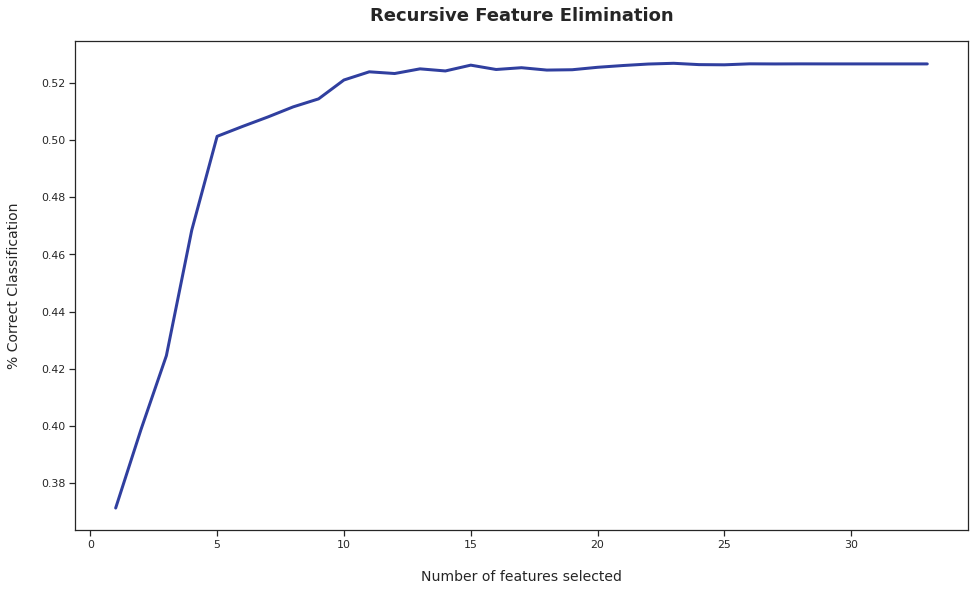

In [ ]:
# Plot
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination', fontsize = 18, fontweight = 'bold', pad = 20)
plt.xlabel('Number of features selected', fontsize = 14, labelpad = 20)
plt.ylabel('% Correct Classification', fontsize = 14, labelpad = 20)
plt.plot(range(1, len(rfecv_la_base.grid_scores_) + 1), rfecv_la_base.grid_scores_, color = '#303F9F', linewidth = 3)

plt.show()

In [ ]:
# Name wise features and count
feature_selected = X_train.columns[rfecv_la_base.get_support()]
feature_selected

Index(['atemp', 'hum', 'windspeed', 'day', 'season_1', 'season_3', 'season_4',
       'weathersit_1', 'weathersit_3', 'month_2', 'month_3', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'holiday_0'],
      dtype='object')

In [ ]:
# Function to calculate accuracy
def model_accuracy(X_train, X_test, y_train, y_test):
    
    model = Lasso()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred) 

In [ ]:
# Accuracy for all features 
model_accuracy(X_train, X_test, y_train, y_test)

0.5418353778441394

In [ ]:
X_train_rfecv_la_base = rfecv_la_base.transform(X_train)
X_tets_rfecv_la_base = rfecv_la_base.transform(X_test)

In [ ]:
# Accuracy for selected features
model_accuracy(X_train_rfecv_la_base, X_tets_rfecv_la_base, y_train, y_test) 

0.543262316441331

**Hyperparameter tuning (Lasso)**

In [ ]:
# Identify hyper parameters for tuning
alpha = [1, 2, 3, 4, 5, 6]

In [ ]:
# Create the search grid
la_grid = {'alpha': alpha}

print(la_grid)

{'alpha': [1, 2, 3, 4, 5, 6]}


In [ ]:
# Create the model to be tuned
la_base = Lasso(random_state = 42)

In [ ]:
# Create the grid search 
la_search = GridSearchCV(estimator = la_base,  param_grid = la_grid, scoring = 'r2', cv = 10)

In [ ]:
# Fit the grid search
la_search.fit(X_train_rfecv_la_base, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='r2', verbose=0)

In [ ]:
# View the best parameters from the search
best_params = la_search.best_params_
best_score  = la_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')

Best parameters: {'alpha': 5}
Best score: 0.5242104929100071


In [ ]:
# Create the final Lasso
la_final = Lasso(alpha = 5, random_state = 42)

In [ ]:
# Train the model 
la_final.fit(X_train_rfecv_la_base, y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=42, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
# Make predictions
y_pred_train = la_final.predict(X_train_rfecv_la_base)
y_pred_test = la_final.predict(X_tets_rfecv_la_base)

In [ ]:
# Print r-squared score
print('R-Square(train set):', r2_score(y_train, y_pred_train))
print('R-Square(test set):', r2_score(y_test, y_pred_test))

R-Square(train set): 0.5843332565066768
R-Square(test set): 0.5466329948592927


**Conclusion**

And the winner is: Ridge regression!
The Ridge regression achieves an R-squared value of 0.55 on the test set.